In [430]:
# import numpy as np
# import pandas as pd
# import os
# import requests
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense
# from urllib.parse import urlencode
# from urllib.request import Request,urlopen

In [431]:
# def get_stockData(symbol,stat):
#     # download stock file from googlefinance
#     url = 'http://finance.yahoo.com/d/quotes.csv?s=%s&f=%s'%(symbol,stat)
#     req = Request(url)
#     res = urlopen(req)
#     return str(resp.read().decode('utf-8').strip())

In [609]:
import credentials
import twitter_settings  
import imp 
imp.reload(twitter_settings)
imp.reload(credentials)
from twitter_settings import *
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [692]:
def connect_db():
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="*****",
        database="TwitterDB",
        auth_plugin='mysql_native_password',
        charset='utf8'  
    )
    
    return mydb

def close_db(mydb):
    mydb.close()
# if mydb.is_connected():
#     mycursor = mydb.cursor()
#     mycursor.execute("SELECT COUNT(*) FROM information_schema.tables where table_name='{0}'".
#                      format(twitter_settings.TABLE_NAME))

In [750]:
start = datetime.datetime(2017, 1, 1)
end = date.today()

stock_df = web.DataReader("NFLX", 'yahoo', start, end)
stock_df.tail()

High      Low     Open    Close   Volume  Adj Close
Date                                                              
2019-11-21 312.6900 304.2600 306.0000 311.6900  7488400   311.6900
2019-11-22 311.4000 304.4100 309.1000 310.4800  5970100   310.4800
2019-11-25 315.7300 305.2500 308.8300 315.5500  7873900   315.5500
2019-11-26 316.5000 311.6900 315.0000 312.4900  5321000   312.4900
2019-11-27 316.3600 313.3700 313.9300 314.6789   907323   314.6789

In [694]:
stock_df.shape

(731, 6)

In [751]:
#close_px = df['Adj Close']
stock_df['mvg_avg'] = stock_df['Adj Close'].rolling(window=100).mean()
stock_df[['Adj Close','mvg_avg']]

Adj Close  mvg_avg
Date                          
2017-01-03   127.4900      nan
2017-01-04   129.4100      nan
2017-01-05   131.8100      nan
2017-01-06   131.0700      nan
2017-01-09   130.9500      nan
2017-01-10   129.8900      nan
2017-01-11   130.5000      nan
2017-01-12   129.1800      nan
2017-01-13   133.7000      nan
2017-01-17   132.8900      nan
2017-01-18   133.2600      nan
2017-01-19   138.4100      nan
2017-01-20   138.6000      nan
2017-01-23   137.3900      nan
2017-01-24   140.1100      nan
2017-01-25   139.5200      nan
2017-01-26   138.9600      nan
2017-01-27   142.4500      nan
2017-01-30   141.2200      nan
2017-01-31   140.7100      nan
2017-02-01   140.7800      nan
2017-02-02   139.2000      nan
2017-02-03   140.2500      nan
2017-02-06   140.9700      nan
2017-02-07   144.0000      nan
2017-02-08   144.7400      nan
2017-02-09   144.1400      nan
2017-02-10   144.8200      nan
2017-02-13   143.2000      nan
2017-02-14   140.8200      nan
2017-02-15   142.2700      nan
2017-02-16   142.0100      nan
2017-02-17   142.2200      nan
2017-02-21   142.6000      nan
2017-02-22   143.8600      nan
2017-02-23   142.7800      nan
2017-02-24   143.2500      nan
2017-02-27   143.4100      nan
2017-02-28   142.1300      nan
2017-03-01   142.6500      nan
2017-03-02   139.5300      nan
2017-03-03   139.1400      nan
2017-03-06   141.9400      nan
2017-03-07   141.4300      nan
2017-03-08   140.3200      nan
2017-03-09   140.5300      nan
2017-03-10   140.8900      nan
2017-03-13   143.5200      nan
2017-03-14   143.1900      nan
2017-03-15   145.2500      nan
2017-03-16   144.3900      nan
2017-03-17   145.1100      nan
2017-03-20   145.8300      nan
2017-03-21   142.4200      nan
2017-03-22   142.6500      nan
2017-03-23   141.8400      nan
2017-03-24   142.0200      nan
2017-03-27   144.0600      nan
2017-03-28   145.1700      nan
2017-03-29   146.4700      nan
2017-03-30   148.0600      nan
2017-03-31   147.8100      nan
2017-04-03   146.9200      nan
2017-04-04   145.5000      nan
2017-04-05   143.6200      nan
2017-04-06   143.7400      nan
2017-04-07   143.1100      nan
2017-04-10   143.8500      nan
2017-04-11   144.3500      nan
2017-04-12   143.8300      nan
2017-04-13   142.9200      nan
2017-04-17   147.2500      nan
2017-04-18   143.3600      nan
2017-04-19   139.7600      nan
2017-04-20   141.1800      nan
2017-04-21   142.8700      nan
2017-04-24   143.8300      nan
2017-04-25   152.1600      nan
2017-04-26   150.1700      nan
2017-04-27   153.0800      nan
2017-04-28   152.2000      nan
2017-05-01   155.3500      nan
2017-05-02   156.4500      nan
2017-05-03   155.5900      nan
2017-05-04   157.2500      nan
2017-05-05   156.6000      nan
2017-05-08   156.3800      nan
2017-05-09   157.4600      nan
2017-05-10   160.2800      nan
2017-05-11   158.5400      nan
2017-05-12   160.8100      nan
2017-05-15   160.0200      nan
2017-05-16   159.4100      nan
2017-05-17   153.2000      nan
2017-05-18   155.7000      nan
2017-05-19   157.0200      nan
2017-05-22   157.1600      nan
2017-05-23   157.9500      nan
2017-05-24   157.7500      nan
2017-05-25   163.0500 144.5886
2017-05-26   162.4300 144.9380
2017-05-30   163.2200 145.2761
2017-05-31   163.0700 145.5887
2017-06-01   162.9900 145.9079
2017-06-02   165.1800 146.2502
2017-06-05   165.0600 146.6019
2017-06-06   165.1700 146.9486
2017-06-07   165.6100 147.3129
2017-06-08   165.8800 147.6347
2017-06-09   158.0300 147.8861
2017-06-12   151.4400 148.0679
2017-06-13   152.7200 148.2110
2017-06-14   152.2000 148.3470
2017-06-15   151.7600 148.4907
2017-06-16   152.3800 148.6134
2017-06-19   153.4000 148.7522
2017-06-20   152.0500 148.8831
2017-06-21   155.0300 149.0089
2017-06-22   154.8900 149.1456
2017-06-23   158.0200 149.3187
2017-06-26   157.5000 149.4859
2017-06-27   151.0300 149.6042
2017-06-28   153.4100 149.7358
2017-06-29   150.0900 149.8270
2017-06-30   149.4100 149.8811
2017-07-03   146.1700 149.8954
2017-07-05   147.6100 149.9301
2017-07-06   

## Plot moving average of stock price

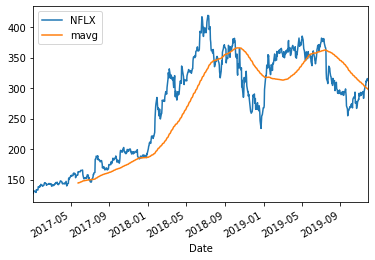

In [752]:

stock_df['Adj Close'].plot(label='NFLX')
stock_df['mvg_avg'].plot(label='mavg')
plt.legend()

In [753]:
stock_df['pcnt_change'] = stock_df['Adj Close'].pct_change()

In [754]:
stock_df

High      Low     Open    Close    Volume  Adj Close  mvg_avg  \
Date                                                                           
2017-01-03 128.1900 124.3100 124.9600 127.4900   9437900   127.4900      nan   
2017-01-04 130.1700 126.5500 127.4900 129.4100   7843600   129.4100      nan   
2017-01-05 132.7500 128.9000 129.2200 131.8100  10185500   131.8100      nan   
2017-01-06 133.8800 129.8100 132.0800 131.0700  10657900   131.0700      nan   
2017-01-09 131.9900 129.8900 131.4800 130.9500   5771800   130.9500      nan   
2017-01-10 132.2200 129.2900 131.2700 129.8900   5985800   129.8900      nan   
2017-01-11 131.5000 129.2500 130.9100 130.5000   5615100   130.5000      nan   
2017-01-12 130.8500 128.5000 130.6300 129.1800   5388900   129.1800      nan   
2017-01-13 133.9300 130.5800 131.1500 133.7000  10515000   133.7000      nan   
2017-01-17 135.4000 132.0900 135.0400 132.8900  12220200   132.8900      nan   
2017-01-18 133.6500 131.0600 133.2100 133.2600  16168600   133.2600      nan   
2017-01-19 143.4600 138.2500 142.0100 138.4100  23203400   138.4100      nan   
2017-01-20 140.7900 137.6600 139.3600 138.6000   9497400   138.6000      nan   
2017-01-23 139.4900 137.3100 138.6500 137.3900   7433900   137.3900      nan   
2017-01-24 140.9300 137.0300 138.1100 140.1100   7754700   140.1100      nan   
2017-01-25 141.3900 139.0500 140.8000 139.5200   7238100   139.5200      nan   
2017-01-26 141.2100 138.5100 140.4500 138.9600   6038300   138.9600      nan   
2017-01-27 142.4900 139.0000 139.4600 142.4500   8323900   142.4500      nan   
2017-01-30 141.9700 138.8000 141.7700 141.2200   8122500   141.2200      nan   
2017-01-31 141.8300 139.7000 140.5500 140.7100   4411600   140.7100      nan   
2017-02-01 142.4100 139.3000 141.2000 140.7800   6033400   140.7800      nan   
2017-02-02 141.0400 139.0500 140.6100 139.2000   3462400   139.2000      nan   
2017-02-03 140.6400 139.1000 139.5100 140.2500   3512600   140.2500      nan   
2017-02-06 141.0000 139.1600 140.0000 140.9700   3552100   140.9700      nan   
2017-02-07 144.2800 141.0500 141.4900 144.0000   8573500   144.0000      nan   
2017-02-08 145.0700 142.5600 143.5700 144.7400   6887100   144.7400      nan   
2017-02-09 145.0900 143.5800 144.9800 144.1400   4555100   144.1400      nan   
2017-02-10 145.3000 143.9700 144.6800 144.8200   6171900   144.8200      nan   
2017-02-13 145.9500 143.0500 145.1900 143.2000   4790400   143.2000      nan   
2017-02-14 144.1100 140.0500 143.2000 140.8200   8367800   140.8200      nan   
2017-02-15 142.4300 140.5100 140.7200 142.2700   5309100   142.2700      nan   
2017-02-16 142.4400 141.0700 142.4200 142.0100   2847500   142.0100      nan   
2017-02-17 142.9000 141.2700 141.7500 142.2200   4588100   142.2200      nan   
2017-02-21 143.3800 141.8100 142.9900 142.6000   3571500   142.6000      nan   
2017-02-22 144.0000 142.1700 142.9200 143.8600   3482000   143.8600      nan   
2017-02-23 144.4900 141.5200 144.4500 142.7800   4668000   142.7800      nan   
2017-02-24 143.5600 141.5500 141.8800 143.2500   3302700   143.2500      nan   
2017-02-27 143.9200 142.3800 143.1200 143.4100   3907400   143.4100      nan   
2017-02-28 143.5700 141.8500 143.3000 142.1300   3862200   142.1300      nan   
2017-03-01 143.2600 142.1000 142.8400 142.6500   4170600   142.6500      nan   
2017-03-02 142.7000 139.0900 142.1500 139.5300   6119900   139.5300      nan   
2017-03-03 140.9100 138.2600 139.6900 139.1400   5399800   139.1400      nan   
2017-03-06 142.8400 140.5400 141.0000 141.9400   7116100   141.9400      nan   
2017-03-07 142.4000 140.3800 141.9900 141.4300   4241000   141.4300      nan   
2017-03-08 142.0600 139.7700 141.4700 140.3200   4085500   140.3200      nan   
2017-03-09 141.2400 139.7400 140.0400 140.5300   2652700   140.5300      nan   
2017-03-10 141.8000 140.2800 141.3900 140.8900   3318500   140.8900      nan   
2017-03-13 143.7100 140.3200 140.9000 143.5200   4922400   143.5200      nan   
2017-03-14 143.

## Plot Percentage change from previous day in stock price

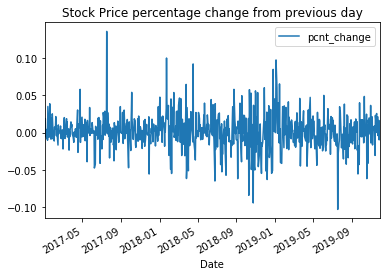

In [755]:
#stock_df['Adj Close'].plot(label='NFLX')
stock_df['pcnt_change'].plot(label='pcnt_change')
plt.title('Stock Price percentage change from previous day')
plt.legend();

## Plot Percentage change in stock Price staring from 2019-11-15

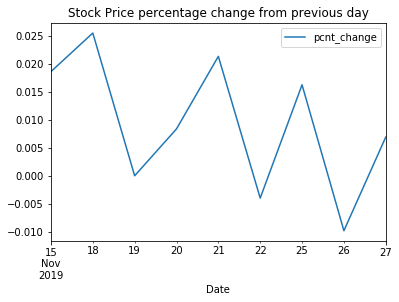

In [756]:
#stock_df['Adj Close'].plot(label='NFLX')
stock_df.loc['2019-11-15':,'pcnt_change'].plot(label='pcnt_change')
plt.title('Stock Price percentage change from previous day')
plt.legend();

## Netflix query

In [765]:
## Open db connection
mydb = connect_db()
netflix_query = "SELECT id_str, created_at, track, text, polarity, compound_score ,negative_score ,positive_score ,neutral_score, hashtags, user_location FROM {} where track like 'Netflix' order by created_at desc" \
                     .format(twitter_settings.HISTORY_TABLE_NAME)
netflix_tweets_df = pd.read_sql(netflix_query,con=mydb)
netflix_tweets_df["created_at"]=netflix_tweets_df.created_at.astype(np.datetime64)
close_db(mydb)
netflix_tweets_df#.head()

id_str          created_at    track  \
0    1199710425379684352 2019-11-27 10:23:49  Netflix   
1    1199710035577839622 2019-11-27 10:22:16  Netflix   
2    1199709953545703430 2019-11-27 10:21:57  Netflix   
3    1199709579984150529 2019-11-27 10:20:28  Netflix   
4    1199709435116965889 2019-11-27 10:19:53  Netflix   
5    1199709109647396864 2019-11-27 10:18:35  Netflix   
6    1199708568217432064 2019-11-27 10:16:26  Netflix   
7    1199708314566823938 2019-11-27 10:15:26  Netflix   
8    1199708274871848961 2019-11-27 10:15:16  Netflix   
9    1199708158328889344 2019-11-27 10:14:49  Netflix   
10   1199707949498654720 2019-11-27 10:13:59  Netflix   
11   1199707557478178819 2019-11-27 10:12:25  Netflix   
12   1199707235468881920 2019-11-27 10:11:09  Netflix   
13   1199706842143719424 2019-11-27 10:09:35  Netflix   
14   1199706726762762240 2019-11-27 10:09:07  Netflix   
15   1199706689731203074 2019-11-27 10:08:58  Netflix   
16   1199706608995127296 2019-11-27 10:08:39  Netflix   
17   1199706105380782082 2019-11-27 10:06:39  Netflix   
18   1199705919564726272 2019-11-27 10:05:55  Netflix   
19   1199705831002050562 2019-11-27 10:05:34  Netflix   
20   1199705828535619584 2019-11-27 10:05:33  Netflix   
21   1199705807492767747 2019-11-27 10:05:28  Netflix   
22   1199705751515742209 2019-11-27 10:05:15  Netflix   
23   1199705741399076866 2019-11-27 10:05:12  Netflix   
24   1199705565389377536 2019-11-27 10:04:30  Netflix   
25   1199705463282995200 2019-11-27 10:04:06  Netflix   
26   1199705460162453510 2019-11-27 10:04:05  Netflix   
27   1199705213432664064 2019-11-27 10:03:06  Netflix   
28   1199705210836246529 2019-11-27 10:03:06  Netflix   
29   1199705016812163073 2019-11-27 10:02:20  Netflix   
30   1199704886327164929 2019-11-27 10:01:48  Netflix   
31   1199704854777741313 2019-11-27 10:01:41  Netflix   
32   1199704783155687430 2019-11-27 10:01:24  Netflix   
33   1199704774146510848 2019-11-27 10:01:22  Netflix   
34   1199704648187293697 2019-11-27 10:00:52  Netflix   
35   1199704540129484803 2019-11-27 10:00:26  Netflix   
36   1199704232091430912 2019-11-27 09:59:13  Netflix   
37   1199704085131227136 2019-11-27 09:58:37  Netflix   
38   1199703661766561792 2019-11-27 09:56:57  Netflix   
39   1199703526630404098 2019-11-27 09:56:24  Netflix   
40   1199703474453258246 2019-11-27 09:56:12  Netflix   
41   1199358897263386624 2019-11-26 11:06:58  Netflix   
42   1199358897221443585 2019-11-26 11:06:58  Netflix   
43   1199358895266967552 2019-11-26 11:06:58  Netflix   
44   1199358895052996608 2019-11-26 11:06:58  Netflix   
45   1199358888975458304 2019-11-26 11:06:56  Netflix   
46   1199358887419400192 2019-11-26 11:06:56  Netflix   
47   1199358886106542080 2019-11-26 11:06:56  Netflix   
48   1199358871376203776 2019-11-26 11:06:52  Netflix   
49   1199358858570977280 2019-11-26 11:06:49  Netflix   
50   1199358854036938753 2019-11-26 11:06:48  Netflix   
51   1199358843433684996 2019-11-26 11:06:45  Netflix   
52   1199358841370140674 2019-11-26 11:06:45  Netflix   
53   1199358838555729920 2019-11-26 11:06:44  Netflix   
54   1199358835179360261 2019-11-26 11:06:43  Netflix   
55   1199358833942048768 2019-11-26 11:06:43  Netflix   
56   1199358831911931910 2019-11-26 11:06:43  Netflix   
57   1199358828841594880 2019-11-26 11:06:42  Netflix   
58   1199358828174667776 2019-11-26 11:06:42  Netflix   
59   1199358823972114434 2019-11-26 11:06:41  Netflix   
60   1199358809539518464 2019-11-26 11:06:37  Netflix   
61   1199358807203291136 2019-11-26 11:06:37  Netflix   
62   1199358799901003777 2019-11-26 11:06:35  Netflix   
63   1199358796604334082 2019-11-26 11:06:34  Netflix   
64   1199358793907363848 2019-11-26 11:06:34  Netflix   
65   1199358781131390978 2019-11-26 11:06:31  Netflix   
66   1199358765713244163 2019-11-26 11:06:27  Netflix   
67   1199358763909701632 2019-11-26 11:06:26  Netflix   
68   1199358762777112576 2019-11-26 11:06:26  Netflix   
69   1199358747673612288 201

In [766]:
netflix_tweets_df["created_at"]=netflix_tweets_df["created_at"].dt.date
netflix_tweets_df["created_at"]=netflix_tweets_df["created_at"].astype(np.datetime64)
netflix_tweets_df.groupby(['created_at','polarity']).mean()

compound_score  negative_score  positive_score  \
created_at polarity                                                   
2019-11-15 -1               -0.4307          0.2269          0.0439   
            0                0.0000          0.0000          0.0000   
            1                0.4198          0.0124          0.2031   
2019-11-18 -1               -0.4669          0.2089          0.0224   
            0                0.0000          0.0140          0.0140   
            1                0.5754          0.0138          0.2596   
2019-11-19 -1               -0.4109          0.1430          0.0000   
            0                0.0000          0.0000          0.0000   
            1                0.4964          0.0000          0.2353   
2019-11-20 -1               -0.4118          0.1988          0.0292   
            0                0.0000          0.0000          0.0000   
            1                0.6983          0.0000          0.2990   
2019-11-21 -1               -0.4183          0.1853          0.0158   
            0                0.0000          0.0000          0.0000   
            1                0.4545          0.0171          0.2095   
2019-11-22 -1               -0.6020          0.2097          0.0483   
            0               -0.0016          0.0043          0.0000   
            1                0.5728          0.0080          0.2634   
2019-11-24  0                0.0000          0.0000          0.0000   
2019-11-25 -1               -0.5243          0.2093          0.0000   
            0                0.0000          0.0000          0.0000   
            1                0.3773          0.0488          0.1522   
2019-11-26 -1               -0.3821          0.1852          0.0579   
            0                0.0000          0.0000          0.0000   
            1                0.4641          0.0322          0.2344   
2019-11-27 -1               -0.4819          0.2020          0.0370   
            0                0.0000          0.0000          0.0000   
            1                0.4090          0.0467          0.2017   

                     neutral_score  
created_at polarity                 
2019-11-15 -1               0.7294  
            0               1.0000  
            1               0.7844  
2019-11-18 -1               0.7687  
            0               0.9720  
            1               0.7265  
2019-11-19 -1               0.8570  
            0               1.0000  
            1               0.7647  
2019-11-20 -1               0.7720  
            0               1.0000  
            1               0.7010  
2019-11-21 -1               0.7987  
            0               1.0000  
            1               0.7735  
2019-11-22 -1               0.7420  
            0               0.9958  
            1               0.7286  
2019-11-24  0               1.0000  
2019-11-25 -1               0.7907  
            0               1.0000  
            1               0.7992  
2019-11-26 -1               0.7569  
            0               1.0000  
            1               0.7333  
2019-11-27 -1               0.7611  
            0               1.0000  
            1               0.7516

## Mean ploarity over time

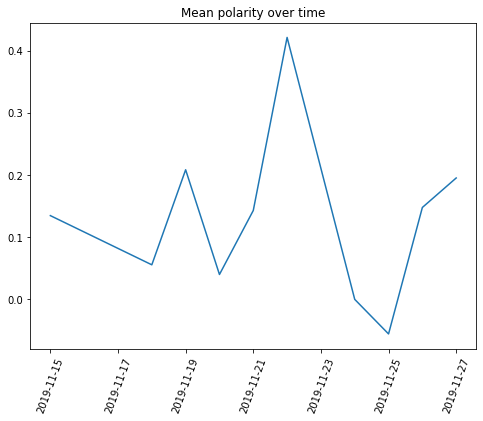

In [767]:
mean_pol = list(dict(netflix_tweets_df.groupby('created_at')['polarity'].mean()).items())
mean_pol.sort(key=lambda x: x[0])

plt.figure(figsize=(8,6))
plt.plot([i[0] for i in mean_pol], [i[1] for i in mean_pol])
plt.xticks(rotation=70)
plt.title('Mean polarity over time');

In [768]:
from operator import methodcaller
#s.map(lambda x: x.strftime('%d-%m-%Y')
stocks_date_creation_list = list(stock_df.index.map(lambda x: x.strftime('%Y-%m-%d')))
stocks_date_creation_list

['2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-27',
 '2017-01-30',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-27',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15',
 '2017-03-16',
 '2017-03-17',
 '2017-03-20',
 '2017-03-21',
 '2017-03-22',
 '2017-03-23',
 '2017-03-24',
 '2017-03-27',
 '2017-03-28',
 '2017-03-29',
 '2017-03-30',
 '2017-03-31',
 '2017-04-03',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-

## FInd the maximum daily polarity and average compound score

In [769]:
def pcnt_check(text):
    try:
        return stock_df.loc[text,'pcnt_change']
    except:
        return 0.0

created_at_list_master=list(set(netflix_tweets_df["created_at"]))

created_at_list=[]
for list_val in created_at_list_master:
    created_at_list.append(str(list_val).split('Timestamp(')[0].split(' ')[0])
created_at_list=sorted(created_at_list)
netflix_avgdaily_df = pd.DataFrame(columns=['created_at','polarity_count','polarity','avg_compound_score'])
for index,date_val in enumerate(created_at_list):
    if date_val in stocks_date_creation_list:
        value_count_series=netflix_tweets_df[netflix_tweets_df["created_at"]==date_val]['polarity'].value_counts()
        polarity_count=value_count_series.max()
        polarity=value_count_series.idxmax()
        coumpound_score=netflix_tweets_df[(netflix_tweets_df["created_at"]==date_val) & 
                      (netflix_tweets_df["polarity"]==polarity)]['compound_score'].mean()
        netflix_avgdaily_df.loc[index,'created_at']=date_val
        netflix_avgdaily_df.loc[index,'polarity_count']=polarity_count
        netflix_avgdaily_df.loc[index,'polarity']=polarity
        netflix_avgdaily_df.loc[index,'avg_compound_score']=coumpound_score

        #netflix_avgdaily_df['pcnt_change']= netflix_avgdaily_df['created_at'].apply(pcnt_check)
        netflix_avgdaily_df['pcnt_change']= netflix_avgdaily_df['created_at'].apply(lambda x: stock_df.loc[x,'pcnt_change'])

netflix_avgdaily_df

#netflix_tweets_df[netflix_tweets_df["created_at"]=='2019-11-21']['polarity'].value_counts()

created_at  polarity_count  polarity avg_compound_score  pcnt_change
0  2019-11-15         21.0000    1.0000             0.4198       0.0187
1  2019-11-18         23.0000    0.0000             0.0000       0.0256
2  2019-11-19         15.0000    0.0000             0.0000       0.0001
3  2019-11-20         14.0000    0.0000             0.0000       0.0085
4  2019-11-21         18.0000    0.0000             0.0000       0.0214
5  2019-11-22         19.0000    1.0000             0.5728      -0.0039
7  2019-11-25          7.0000    0.0000             0.0000       0.0163
8  2019-11-26         41.0000    0.0000             0.0000      -0.0097
9  2019-11-27         19.0000    0.0000             0.0000       0.0070

In [746]:
# netflix_avgdaily_df.drop(index=netflix_avgdaily_df.loc[
#     netflix_avgdaily_df['created_at']=='2019-11-25'].index[0],inplace=True)
# netflix_avgdaily_df=netflix_avgdaily_df.reset_index(drop=True)
# netflix_avgdaily_df

In [770]:
netflix_avgdaily_df['created_at'] = netflix_avgdaily_df['created_at'].astype(np.datetime64)
netflix_avgdaily_df['polarity_count'] = netflix_avgdaily_df['polarity_count'].astype(np.int)
netflix_avgdaily_df['polarity'] = netflix_avgdaily_df['polarity'].astype(np.int)
netflix_avgdaily_df['avg_compound_score'] = netflix_avgdaily_df['avg_compound_score'].astype(np.float)
netflix_avgdaily_df['pcnt_change'] = netflix_avgdaily_df['pcnt_change'].astype(np.float)
netflix_avgdaily_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 9
Data columns (total 5 columns):
created_at            9 non-null datetime64[ns]
polarity_count        9 non-null int64
polarity              9 non-null int64
avg_compound_score    9 non-null float64
pcnt_change           9 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 752.0 bytes


## Find Correlation between Sentiment Compound Score and Percentage change in stock price from previous day

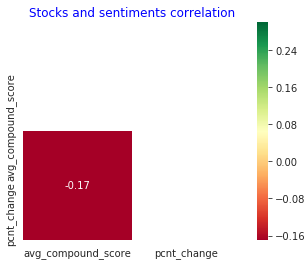

In [771]:
mask = np.zeros_like(netflix_avgdaily_df[['avg_compound_score','pcnt_change']].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(netflix_avgdaily_df[['avg_compound_score','pcnt_change']].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 cmap='RdYlGn',fmt='.2f');
plt.title("Stocks and sentiments correlation",color='blue');

## Stats
- Nul Hypothesis
- p-value
- r2 score

In [772]:
y=netflix_avgdaily_df[['pcnt_change']]
X=netflix_avgdaily_df[['avg_compound_score']]
combined_lm = sm.OLS(y, X).fit()

In [773]:
combined_lm.summary()

/Users/vidhu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            pcnt_change   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):             -0.089
Method:                 Least Squares   F-statistic:                             0.2643
Date:                Wed, 27 Nov 2019   Prob (F-statistic):                       0.621
Time:                        23:27:07   Log-Likelihood:                          25.328
No. Observations:                   9   AIC:                                     -48.66
Df Residuals:                       8   BIC:                                     -48.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
avg_compound_score     0.0111      0.022      0.514      0.621      -0.039       0.061
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.594
Skew:                          -0.249   Prob(JB):                        0.743
Kurtosis:                       1.844   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Obnservations from above model
- 3.2% of the variation in pcnt_change of stock price is explained by compound_score feature
- Null Hypothesis - there is no relationship between pcnt_change in stock price and compound_score of the tweets
- Since the p-value is 0.621 so there is not enough evidence to reject the Null Hypothesis

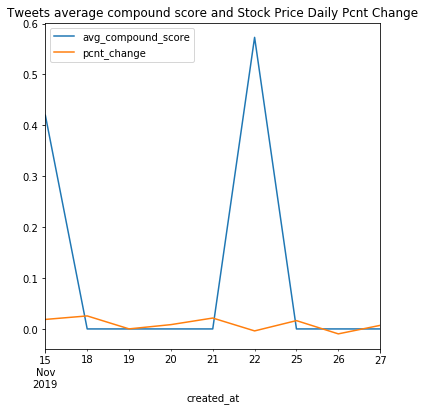

In [774]:
plt.figure(figsize=(6,6))
avgdaily_plot_df = netflix_avgdaily_df.copy()
avgdaily_plot_df.set_index('created_at',inplace=True)
avgdaily_plot_df['avg_compound_score'].plot(label='avg_compound_score')
avgdaily_plot_df['pcnt_change'].plot(label='pcnt_change');
plt.title('Tweets average compound score and Stock Price Daily Pcnt Change')
plt.legend();

# Extra

In [472]:
netflix_tweets_df[netflix_tweets_df["created_at"]=='2019-11-21'].sort_values(by=['polarity','compound_score'])

id_str created_at    track  \
71  1197665778184720385 2019-11-21  Netflix   
38  1197665994937917440 2019-11-21  Netflix   
65  1197665828231102464 2019-11-21  Netflix   
40  1197665990676566016 2019-11-21  Netflix   
48  1197665924280733697 2019-11-21  Netflix   
59  1197665868492095488 2019-11-21  Netflix   
39  1197665991695753217 2019-11-21  Netflix   
41  1197665980027158528 2019-11-21  Netflix   
42  1197665979628695553 2019-11-21  Netflix   
45  1197665954898927616 2019-11-21  Netflix   
47  1197665927480979457 2019-11-21  Netflix   
50  1197665919495032834 2019-11-21  Netflix   
51  1197665914965155841 2019-11-21  Netflix   
53  1197665902281531392 2019-11-21  Netflix   
54  1197665895180427264 2019-11-21  Netflix   
55  1197665894073282560 2019-11-21  Netflix   
56  1197665887811059712 2019-11-21  Netflix   
57  1197665880957579264 2019-11-21  Netflix   
61  1197665863836434432 2019-11-21  Netflix   
66  1197665826217889794 2019-11-21  Netflix   
67  1197665812636680197 2019-11-21  Netflix   
69  1197665795872038913 2019-11-21  Netflix   
70  1197665786992766978 2019-11-21  Netflix   
72  1197665776154664960 2019-11-21  Netflix   
60  1197665866785214465 2019-11-21  Netflix   
46  1197665946426474496 2019-11-21  Netflix   
43  1197665977137324034 2019-11-21  Netflix   
68  1197665808027209729 2019-11-21  Netflix   
52  1197665912070918150 2019-11-21  Netflix   
64  1197665842789539845 2019-11-21  Netflix   
63  1197665856425205763 2019-11-21  Netflix   
44  1197665969684074497 2019-11-21  Netflix   
62  1197665861475041280 2019-11-21  Netflix   
58  1197665875488387072 2019-11-21  Netflix   
49  1197665923487813632 2019-11-21  Netflix   

                                                 text  polarity  \
71  This should scare the hell out of the Netflix ...        -1   
38  It makes me sad that my only way of watching t...        -1   
65  e portanto cabe ao felipe neto fazer a netflix...        -1   
40  From hot to toxic yoga a new Netflix film docu...        -1   
48  my notes app be like Grocery list Future baby ...        -1   
59    oh man Marie Kondo should ve stopped at Netflix        -1   
39  So DragRaceUK finished think I m gonna binge w...         0   
41                     le film est A1 btw sur netflix         0   
42                         Netflix is doing Gods work         0   
45  When he invites you to Netflix amp chill but d...         0   
47                         Im in bed watching Netflix         0   
50                            Welp Netflix it is then         0   
51  I wana star in a Netflix series Twitter do ur ...         0   
53  Burlesque Beefcake amp Oscar Bait Everything C...         0   
54  Netflix To Enter Extensive Partnership With CJ...         0   
55  I replaced Netflix and logged into my brother ...         0   
56  What if Norse mythology wasnt a myth All episo...         0   
57  netflix blankets rain on the window movie on t...         0   
61  Vanessa Hudgens from The Princess Switch to th...         0   
66                                            Netflix         0   
67            las series de hbo las series de netflix         0   
69  December 6 Its official Season 5 drops on Netf...         0   
70  T Mobile service came a long way Im watching N...         0   
72                           Bebes kids is on Netflix         0   
60  Certain man will pay a 10 99 monthly Netflix s...         1   
46  No way im watching that kay haha My kids would...         1   
43  when burlesque comes to netflix i promise i wi...         1   
68  whiskey I recommend Dolemite is my name on net...         1   
52  netflix adding the untouchables but not scarfa...         1   
64    Cancelled Worf stars in his own Netflix special         1   
63                Any good movies on Netflix and Hulu         1   
44  Bebe s Kids was added to Netflix You re welcom...         1   
62  I tengah tengok Sully kt netflix I nangis part...         1   
58  The 30 for 30 podcast was just wow but thi

## Lets Create a dataframe and combine the tweets date wise - will check overall compound score of all tweets in a day

In [445]:
#combined_tweet_copy_df = combined_tweet_df.copy()
combined_tweet_df=pd.DataFrame(columns=['created_at','text'])

indx=0
get_tweet=""
for i in range(0,len(netflix_tweets_df)-1):
    get_date=netflix_tweets_df['created_at'].iloc[i]
    next_date=netflix_tweets_df['created_at'].iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+netflix_tweets_df['text'].iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        combined_tweet_df.set_value(indx,'created_at',get_date)
        combined_tweet_df.set_value(indx,'text',get_tweet)
        indx=indx+1
        get_tweet=" "

combined_tweet_df['created_at']=combined_tweet_df['created_at'].astype(np.datetime64)

isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(combined_tweet_df['created_at']).map(isBusinessDay)
        

        
combined_tweet_df=combined_tweet_df[match_series]
combined_tweet_df


/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


created_at                                               text
0 2019-11-22  SORTEO RANDOM SEMI FULL ACCES UNMIGRATED FULL ...
1 2019-11-21   It makes me sad that my only way of watching ...
2 2019-11-20   netflix and chi sleep tfw you realize THE IRI...
3 2019-11-19   Anime Netflix Adaptation Your 8 99 Netflix su...
4 2019-11-18   Nobody paksa you subscribe to Netflix Nobody ...

In [446]:
#combined_tweet_df['pcnt_change']=stock_df[]
combined_tweet_df['pcnt_change']= combined_tweet_df['created_at'].apply(lambda x: stock_df.loc[x,'pcnt_change'])
combined_tweet_df

created_at                                               text  pcnt_change
0 2019-11-22  SORTEO RANDOM SEMI FULL ACCES UNMIGRATED FULL ...      -0.0039
1 2019-11-21   It makes me sad that my only way of watching ...       0.0214
2 2019-11-20   netflix and chi sleep tfw you realize THE IRI...       0.0085
3 2019-11-19   Anime Netflix Adaptation Your 8 99 Netflix su...       0.0001
4 2019-11-18   Nobody paksa you subscribe to Netflix Nobody ...       0.0256

In [447]:
analyser = SentimentIntensityAnalyzer()

for row_index, row in combined_tweet_df.T.iteritems():
    try:
        tweet = unicodedata.normalize('NFKD', combined_tweet_df.loc[row_index, 'text'])
        score = analyser.polarity_scores(tweet)
        combined_tweet_df.set_value(row_index, 'compound_score', score['compound'])
        combined_tweet_df.set_value(row_index, 'negative_score', score['neg'])
        combined_tweet_df.set_value(row_index, 'neutral_score', score['neu'])
        combined_tweet_df.set_value(row_index, 'positive_score', score['pos'])
        if score['compound']>=0.05: #positive
            polarity = 1
        elif (score['compound']>-0.05) & (score['compound']<0.05): #neutral
            polarity = 0
        elif score['compound']<=-0.05: #negative
            polarity = -1
        combined_tweet_df.set_value(row_index, 'polarity', polarity)
    except TypeError:
        print (combined_tweet_df.loc[row_index, 'text'])
        print (row_index)

combined_tweet_df

/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/vidhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_

created_at                                               text  pcnt_change  \
0 2019-11-22  SORTEO RANDOM SEMI FULL ACCES UNMIGRATED FULL ...      -0.0039   
1 2019-11-21   It makes me sad that my only way of watching ...       0.0214   
2 2019-11-20   netflix and chi sleep tfw you realize THE IRI...       0.0085   
3 2019-11-19   Anime Netflix Adaptation Your 8 99 Netflix su...       0.0001   
4 2019-11-18   Nobody paksa you subscribe to Netflix Nobody ...       0.0256   

   compound_score  negative_score  neutral_score  positive_score  polarity  
0          0.9980          0.0710         0.7250          0.2050    1.0000  
1          0.9721          0.0640         0.8300          0.1060    1.0000  
2          0.9396          0.0550         0.8340          0.1100    1.0000  
3          0.8937          0.0270         0.9090          0.0650    1.0000  
4          0.9922          0.1010         0.7510          0.1480    1.0000

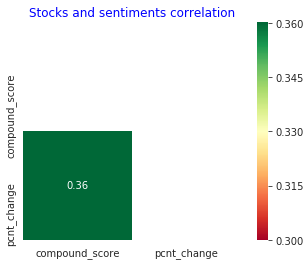

In [448]:
mask = np.zeros_like(combined_tweet_df[['compound_score','pcnt_change']].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(combined_tweet_df[['compound_score','pcnt_change']].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 cmap='RdYlGn',fmt='.2f');
plt.title("Stocks and sentiments correlation",color='blue');

In [449]:
y=combined_tweet_df[['pcnt_change']]
X=combined_tweet_df[['compound_score']]
combined_lm = sm.OLS(y, X).fit()

In [450]:
combined_lm.summary()

/Users/vidhu/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            pcnt_change   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.324
Method:                 Least Squares   F-statistic:                              3.393
Date:                Sun, 24 Nov 2019   Prob (F-statistic):                       0.139
Time:                        21:39:17   Log-Likelihood:                          15.283
No. Observations:                   5   AIC:                                     -28.57
Df Residuals:                       4   BIC:                                     -28.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
compound_score     0.0109      0.006      1.842      0.139      -0.006       0.027
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.265
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.541
Skew:                           0.081   Prob(JB):                        0.763
Kurtosis:                       1.396   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Obnservations from above model
- 47% of the variation in pcnt_change of stock price is explained by compound_score feature
- Since the p-value is 0.135 so there is not enough evidence to reject the Null Hypothese that there is no relationship between pcnt_change in stock price and compound_score of the tweets

In [451]:
combined_lm.pvalues

compound_score   0.1393
dtype: float64

In [452]:
combined_lm.f_pvalue

0.13927763199698134

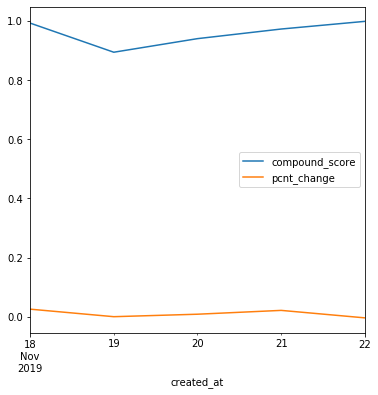

In [453]:
plt.figure(figsize=(6,6))
combined_tweet_plot_df = combined_tweet_df.copy()
combined_tweet_plot_df.set_index('created_at',inplace=True)
combined_tweet_plot_df['compound_score'].plot(label='compound_score')
combined_tweet_plot_df['pcnt_change'].plot(label='pcnt_change');
plt.legend();